# Assignment-5pat-a: TimeGPT

TimeGPT multi-variate and long horizon colab with example timeseries data




## Setup

In [2]:
!pip install -Uqq nixtla datasetsforecast utilsforecast

In [3]:
from nixtla.utils import in_colab

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
IN_COLAB = in_colab()

In [6]:
import pandas as pd
from nixtla import NixtlaClient
from google.colab import userdata
from datasetsforecast.long_horizon import LongHorizon
from utilsforecast.losses import mae

### Get API Keys

In [11]:
NIXTLA_API_KEY = userdata.get('NIXTLA_API_KEY')
nixtla_client = NixtlaClient(
    api_key = NIXTLA_API_KEY
)

## Multiple series forecasting

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/tourism.csv')
df.head()

,Quarter,Region,State,Purpose,Trips
0,1998 Q1,Adelaide,South Australia,Business,135.077690
1,1998 Q2,Adelaide,South Australia,Business,109.987316
2,1998 Q3,Adelaide,South Australia,Business,166.034687
3,1998 Q4,Adelaide,South Australia,Business,127.160464
4,1999 Q1,Adelaide,South Australia,Business,137.448533


In [20]:

df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')
df.head()

,unique_id,ds,y
0,BE,2016-10-22 00:00:00,70.00
1,BE,2016-10-22 01:00:00,37.10
2,BE,2016-10-22 02:00:00,37.10
3,BE,2016-10-22 03:00:00,44.75
4,BE,2016-10-22 04:00:00,37.10


In [17]:
print(df.columns)

Index(['Quarter', 'Region', 'State', 'Purpose', 'Trips'], dtype='object')


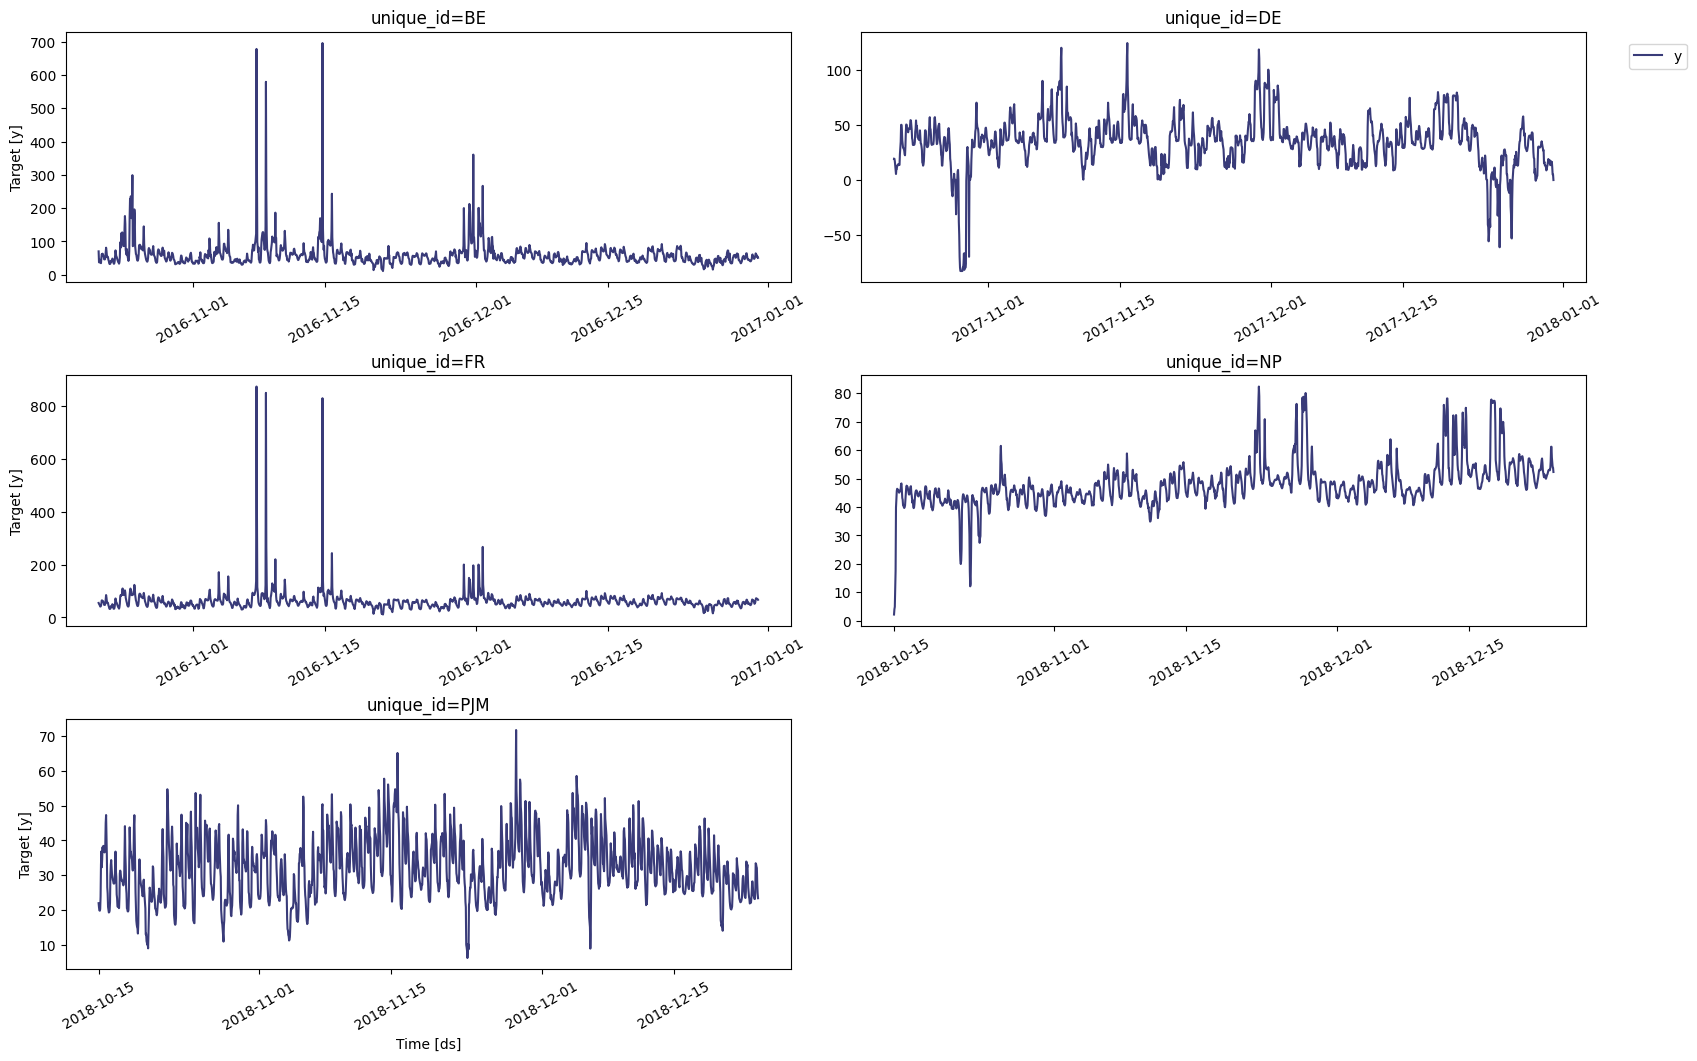

In [21]:
nixtla_client.plot(df)


### Forecasting Multiple Series

In [22]:
timegpt_fcst_multiseries_df = nixtla_client.forecast(df=df, h=24, level=[80, 90])
timegpt_fcst_multiseries_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,BE,2016-12-31 00:00:00,45.190674,54.872640,57.369972,35.508710,33.011375
1,BE,2016-12-31 01:00:00,43.244910,51.113556,56.101364,35.376266,30.388454
2,BE,2016-12-31 02:00:00,41.958893,48.577103,54.632137,35.340683,29.285650
3,BE,2016-12-31 03:00:00,39.796677,47.265984,49.683872,32.327370,29.909481
4,BE,2016-12-31 04:00:00,39.204560,47.410786,47.677520,30.998333,30.731598


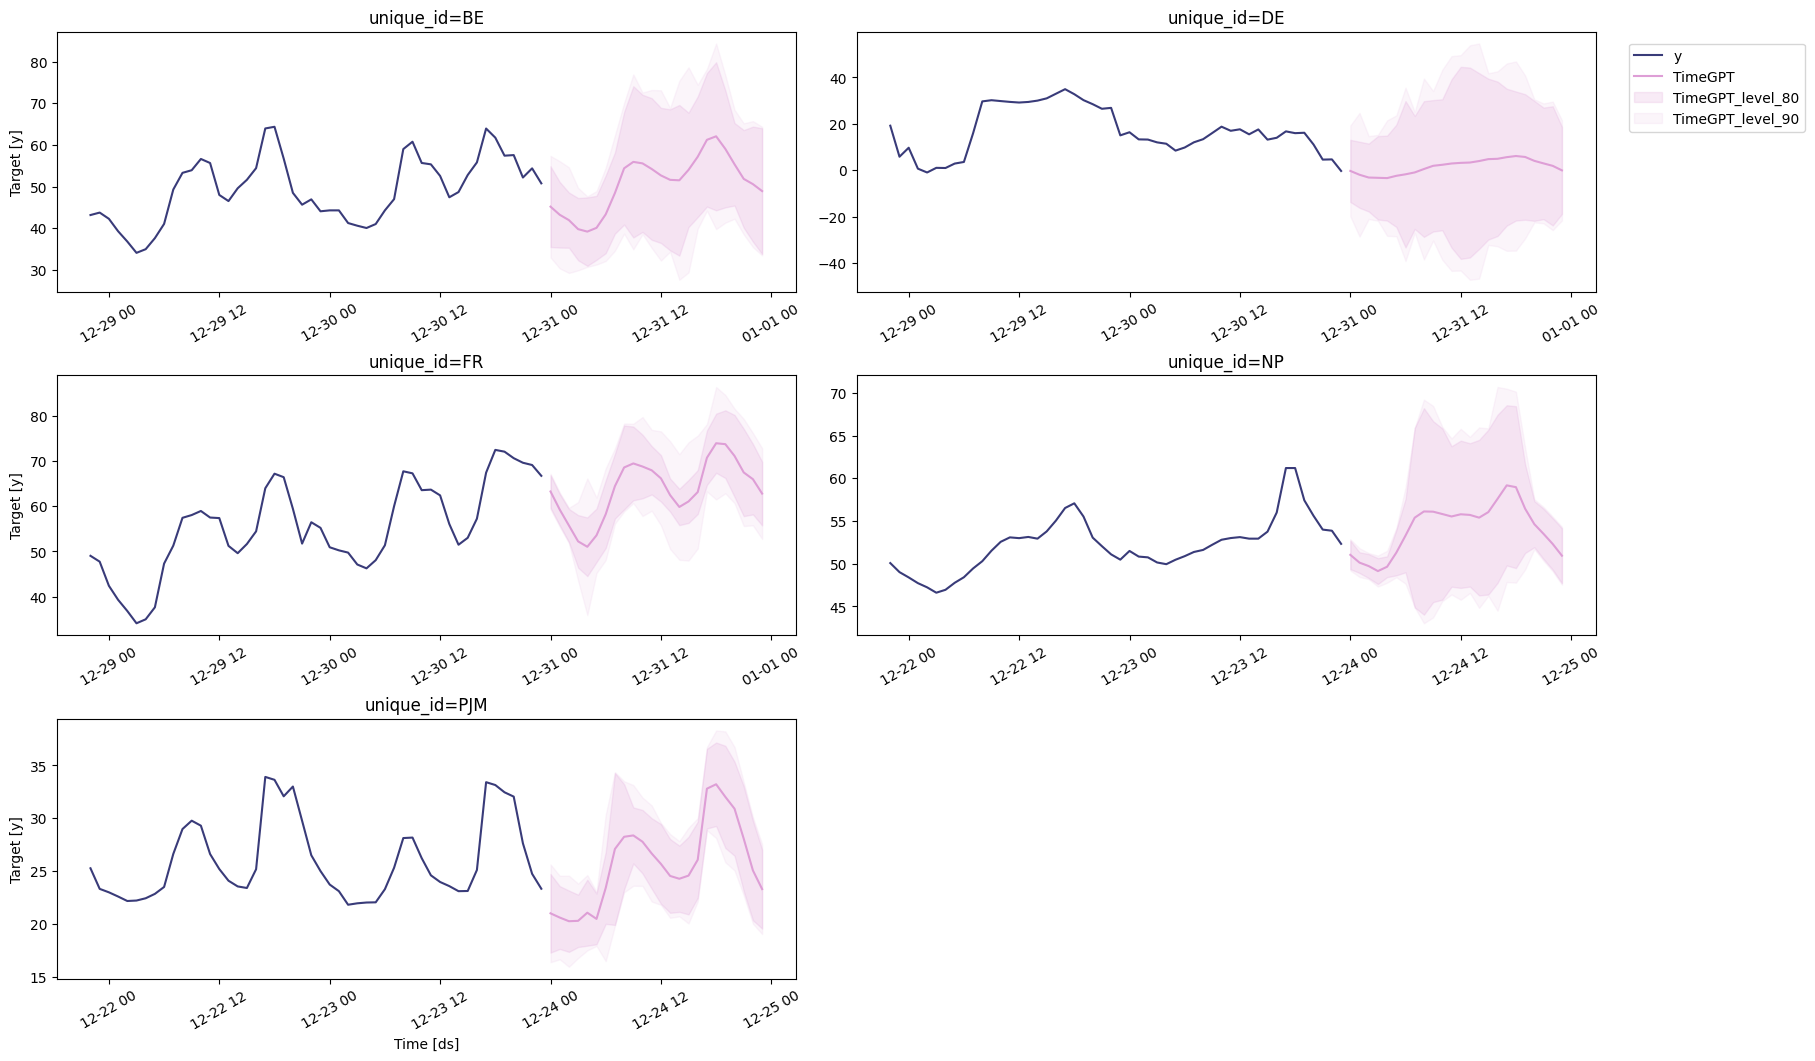

In [27]:
nixtla_client.plot(df, timegpt_fcst_multiseries_df, max_insample_length=50, level=[80, 90])

### Historical forecast

In [28]:
timegpt_fcst_multiseries_with_history_df = nixtla_client.forecast(df=df, h=24, level=[80, 90], add_history=True)
timegpt_fcst_multiseries_with_history_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,BE,2016-10-27 00:00:00,56.072560,98.19364,110.134380,13.951481,2.010740
1,BE,2016-10-27 01:00:00,52.413048,94.53413,106.474870,10.291969,-1.648771
2,BE,2016-10-27 02:00:00,52.805850,94.92693,106.867670,10.684772,-1.255968
3,BE,2016-10-27 03:00:00,52.581253,94.70233,106.643074,10.460175,-1.480566
4,BE,2016-10-27 04:00:00,52.667156,94.78824,106.728970,10.546078,-1.394663


Dataset Preview:
  unique_id                   ds      y
0        BE  2016-10-22 00:00:00  70.00
1        BE  2016-10-22 01:00:00  37.10
2        BE  2016-10-22 02:00:00  37.10
3        BE  2016-10-22 03:00:00  44.75
4        BE  2016-10-22 04:00:00  37.10
Unique IDs: ['BE' 'DE' 'FR' 'NP' 'PJM']


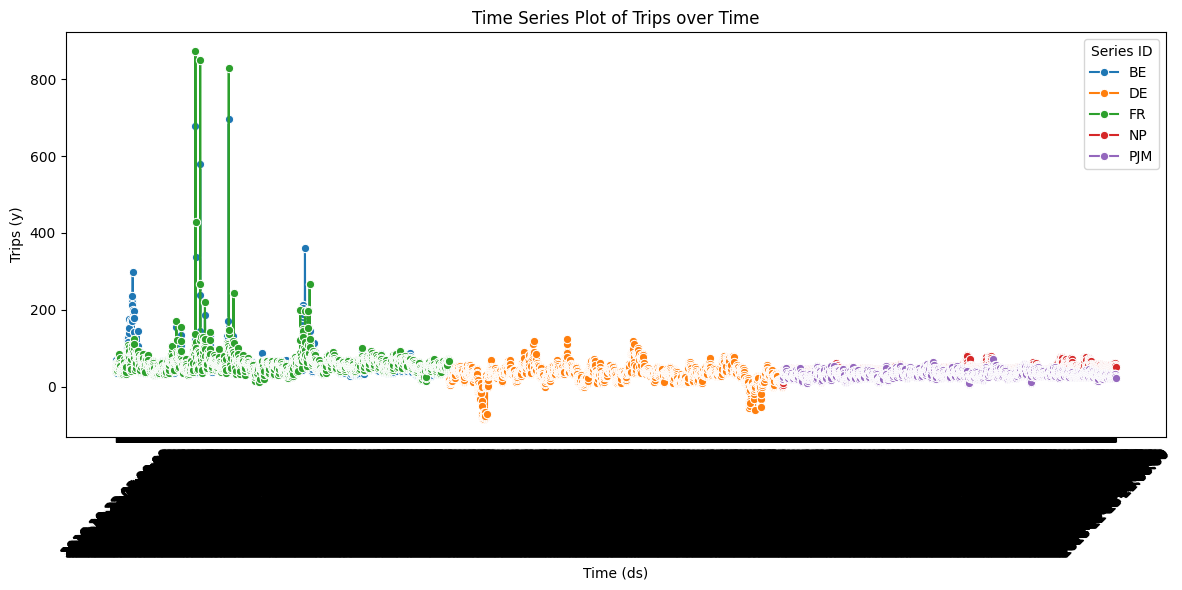

Grouped Data Preview:
     unique_id                   ds          y
1291        BE  2016-12-14 19:00:00  79.050000
1292        BE  2016-12-14 20:00:00  70.380000
1293        BE  2016-12-14 21:00:00  60.770000
1294        BE  2016-12-14 22:00:00  59.490000
1295        BE  2016-12-14 23:00:00  57.530000
...        ...                  ...        ...
8395       PJM  2018-12-23 19:00:00  32.461970
8396       PJM  2018-12-23 20:00:00  32.052179
8397       PJM  2018-12-23 21:00:00  27.632347
8398       PJM  2018-12-23 22:00:00  24.746053
8399       PJM  2018-12-23 23:00:00  23.333499

[1945 rows x 3 columns]


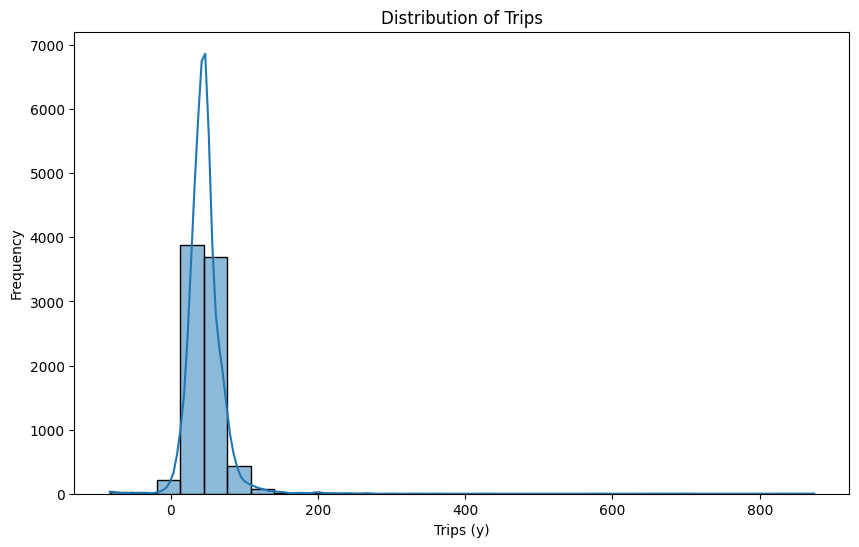

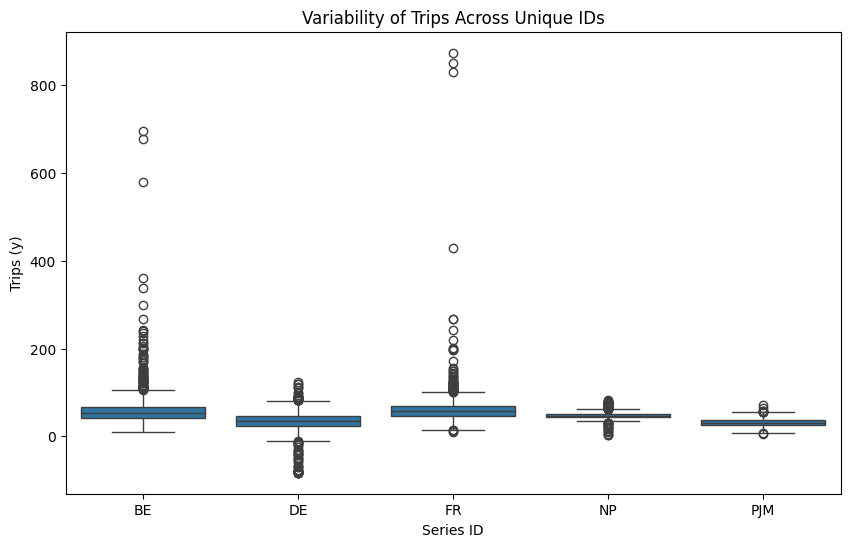

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is prepared
df.rename(columns={'Quarter': 'ds', 'Trips': 'y'}, inplace=True)

# Verify the structure of the dataset
print("Dataset Preview:")
print(df.head())

# Create a 'unique_id' column if it doesn't exist (for multiseries data)
if 'unique_id' not in df.columns:
    df['unique_id'] = 'series_1'

# Check the unique series
print(f"Unique IDs: {df['unique_id'].unique()}")

# Visualize the Time Series Data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ds', y='y', hue='unique_id', marker='o')
plt.title("Time Series Plot of Trips over Time")
plt.xlabel("Time (ds)")
plt.ylabel("Trips (y)")
plt.xticks(rotation=45)
plt.legend(title="Series ID")
plt.tight_layout()
plt.show()

# Plot grouped data with nixtla_client
grouped_data = df.groupby('unique_id').tail(365 + 24)
print("Grouped Data Preview:")
print(grouped_data)

# Generate the plot using nixtla_client (ensure `nixtla_client` is defined)
nixtla_client.plot(
    df,
    grouped_data,
    max_insample_length=365,
    level=[80, 90]
)

# Additional Insights: Distribution of Trips
plt.figure(figsize=(10, 6))
sns.histplot(df['y'], kde=True, bins=30)
plt.title("Distribution of Trips")
plt.xlabel("Trips (y)")
plt.ylabel("Frequency")
plt.show()

# Boxplot to Analyze Variability
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='unique_id', y='y')
plt.title("Variability of Trips Across Unique IDs")
plt.xlabel("Series ID")
plt.ylabel("Trips (y)")
plt.show()


In [30]:
I# Import necessary libraries
import pandas as pd

# Ensure the dataset and required columns are prepared
df.rename(columns={'Quarter': 'ds', 'Trips': 'y'}, inplace=True)

# Display the first few rows of the dataset for verification
print("Dataset Preview:")
print(df.head())

# Ensure 'unique_id' exists or create it (if dealing with multiseries data)
if 'unique_id' not in df.columns:
    df['unique_id'] = 'series_1'  # Assign a default ID for single series
    print("Added 'unique_id' column with default values.")

# Verify dataset structure
print("Dataset Columns and Types:")
print(df.dtypes)

# Display the last 10 rows of the dataset for debugging
print("Last 10 Rows of the Dataset:")
print(df.tail(10))

# Adjust the plotting code for better clarity
nixtla_client.plot(
    df,
    df.groupby('unique_id').tail(365 + 24),  # Assuming 365 days + 24 hours of data
    max_insample_length=365,
    level=[80, 90]
)

# Confirm the structure of the grouped DataFrame
print("Grouped DataFrame Preview:")
print(df.groupby('unique_id').tail(5))  # Preview the last 5 rows of each group


Dataset Preview:
  unique_id                   ds      y
0        BE  2016-10-22 00:00:00  70.00
1        BE  2016-10-22 01:00:00  37.10
2        BE  2016-10-22 02:00:00  37.10
3        BE  2016-10-22 03:00:00  44.75
4        BE  2016-10-22 04:00:00  37.10
Dataset Columns and Types:
unique_id     object
ds            object
y            float64
dtype: object
Last 10 Rows of the Dataset:
     unique_id                   ds          y
8390       PJM  2018-12-23 14:00:00  23.103575
8391       PJM  2018-12-23 15:00:00  23.121456
8392       PJM  2018-12-23 16:00:00  25.109049
8393       PJM  2018-12-23 17:00:00  33.418392
8394       PJM  2018-12-23 18:00:00  33.149222
8395       PJM  2018-12-23 19:00:00  32.461970
8396       PJM  2018-12-23 20:00:00  32.052179
8397       PJM  2018-12-23 21:00:00  27.632347
8398       PJM  2018-12-23 22:00:00  24.746053
8399       PJM  2018-12-23 23:00:00  23.333499
Grouped DataFrame Preview:
     unique_id                   ds          y
1675        BE  201

In [33]:
Y_df, *_ = LongHorizon.load(directory='./', group='ETTh1')
Y_df.head()

,unique_id,ds,y
0,OT,2016-07-01 00:00:00,1.460552
1,OT,2016-07-01 01:00:00,1.161527
2,OT,2016-07-01 02:00:00,1.161527
3,OT,2016-07-01 03:00:00,0.862611
4,OT,2016-07-01 04:00:00,0.525227


In [35]:
fcst_df = nixtla_client.forecast(
    df=input_seq,
    h=96,
    level=[90],
    finetune_steps=10,
    finetune_loss='mae',
    model='timegpt-1-long-horizon',
    time_col='ds',
    target_col='y'
)

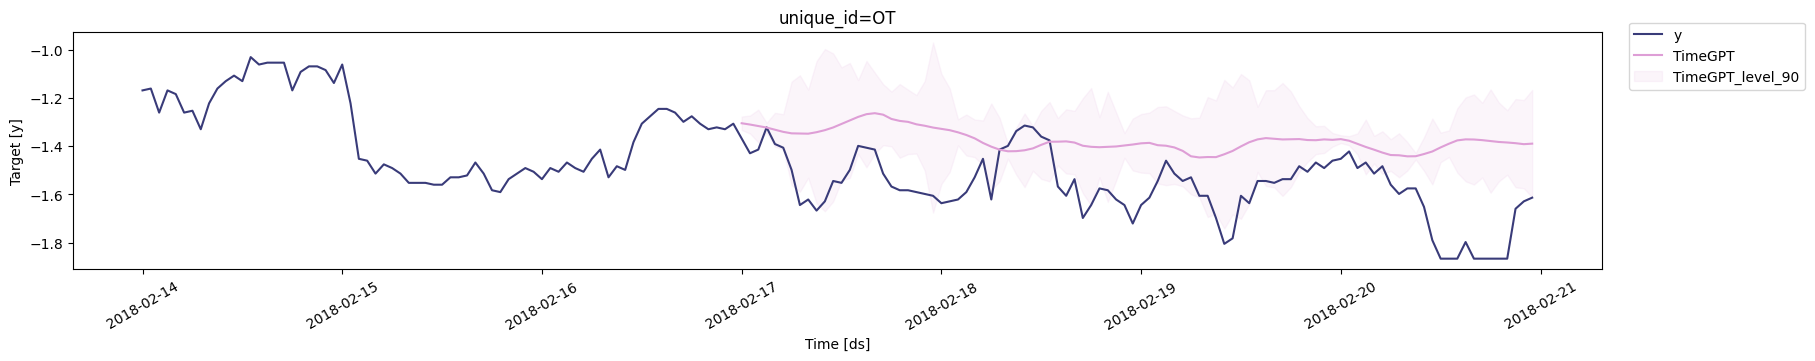

In [45]:
nixtla_client.plot(Y_df[-168:], fcst_df, models=['TimeGPT'], level=[90], time_col='ds', target_col='y')

### Evaluation

In [37]:
test = test.copy()
test.loc[:, 'TimeGPT'] = fcst_df['TimeGPT'].values

In [38]:
evaluation = mae(test, models=['TimeGPT'], id_col='unique_id', target_col='y')

In [39]:
print(evaluation)

  unique_id   TimeGPT
0        OT  0.205319
